In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split, ShuffleSplit, KFold, LeaveOneOut, StratifiedKFold, cross_val_score, learning_curve
from sklearn.feature_selection import SelectKBest, f_classif
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from imblearn.under_sampling import RandomUnderSampler
import random
import glob
import os


import warnings
warnings.filterwarnings('ignore')

In [2]:
loan_approval = pd.read_csv('./archive/Loan.csv')
loan_approval.shape

(20000, 36)

In [3]:
loan_approval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [4]:
loan_approval.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [5]:
loan_approval.isna().sum()

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
Interest

In [6]:
loan_approval.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,20000.0,39.752600,11.622713,18.000000,32.000000,40.000000,48.000000,8.000000e+01
AnnualIncome,20000.0,59161.473550,40350.845168,15000.000000,31679.000000,48566.000000,74391.000000,4.853410e+05
CreditScore,20000.0,571.612400,50.997358,343.000000,540.000000,578.000000,609.000000,7.120000e+02
Experience,20000.0,17.522750,11.316836,0.000000,9.000000,17.000000,25.000000,6.100000e+01
LoanAmount,20000.0,24882.867800,13427.421217,3674.000000,15575.000000,21914.500000,30835.000000,1.847320e+05
LoanDuration,20000.0,54.057000,24.664857,12.000000,36.000000,48.000000,72.000000,1.200000e+02
NumberOfDependents,20000.0,1.517300,1.386325,0.000000,0.000000,1.000000,2.000000,5.000000e+00
MonthlyDebtPayments,20000.0,454.292700,240.507609,50.000000,286.000000,402.000000,564.000000,2.919000e+03
CreditCardUtilizationRate,20000.0,0.286381,0.159793,0.000974,0.160794,0.266673,0.390634,9.173801e-01
NumberOfOpenCreditLines,20000.0,3.023350,1.736161,0.000000,2.000000,3.000000,4.000000,1.300000e+01


In [7]:
loan_approval['LoanApproved'].value_counts()

LoanApproved
0    15220
1     4780
Name: count, dtype: int64

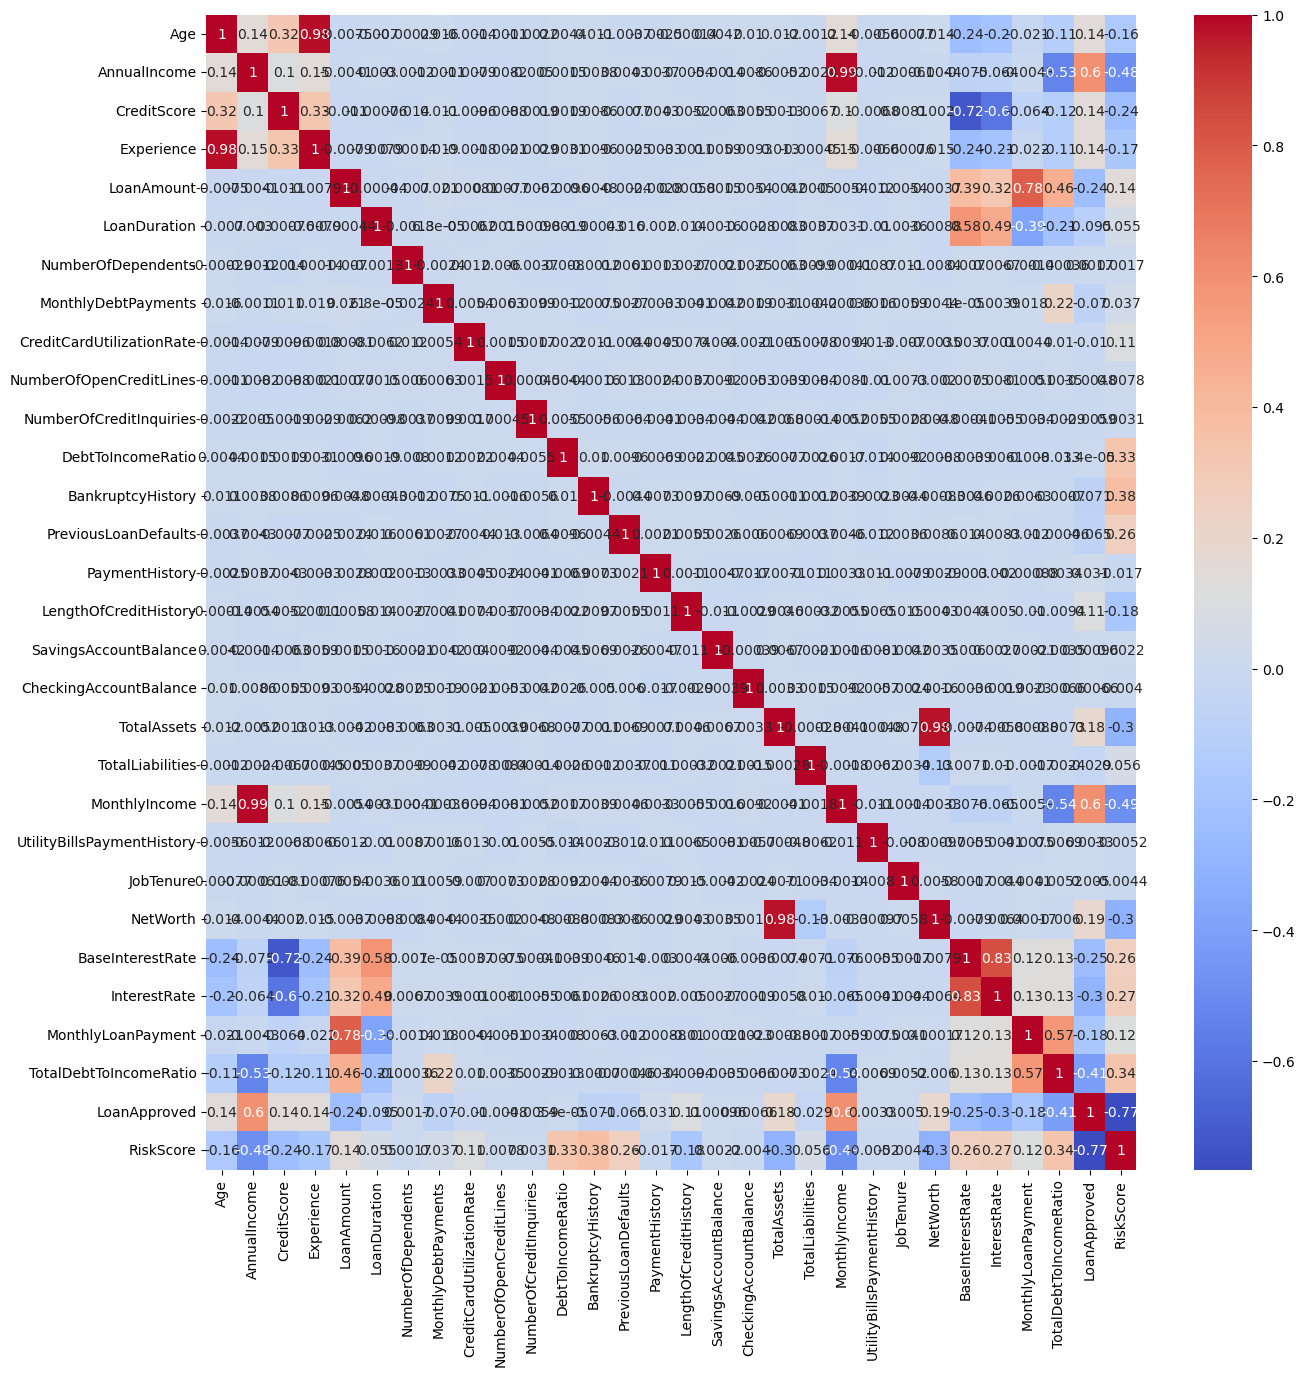

In [8]:
plt.figure(figsize=(15,15))
sns.heatmap(loan_approval.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.show()

In [9]:
loan_approval['ApplicationDate'] = pd.to_datetime(loan_approval['ApplicationDate'])
loan_approval['ApplicationYear'] = loan_approval['ApplicationDate'].dt.year
loan_approval['ApplicationMonth'] = loan_approval['ApplicationDate'].dt.month
loan_approval = loan_approval.drop(columns=['ApplicationDate'])  #

In [10]:
X = loan_approval.drop(columns=['LoanApproved', 'RiskScore'])
y = loan_approval['LoanApproved']

In [11]:
y

0        0
1        0
2        0
3        0
4        1
        ..
19995    0
19996    0
19997    0
19998    0
19999    0
Name: LoanApproved, Length: 20000, dtype: int64

In [12]:
X.shape

(20000, 35)

In [13]:
y.shape

(20000,)

In [14]:
ros = RandomUnderSampler()
X, y = ros.fit_resample(X, y)

In [15]:
print(X.shape)
print(y.shape)

(9560, 35)
(9560,)


In [16]:
categorical_cols = ['EmploymentStatus', 'EducationLevel', 'MaritalStatus', 
                    'HomeOwnershipStatus', 'LoanPurpose']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

In [17]:
# Define preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Normalize numerical data
        ('cat', OneHotEncoder(), categorical_cols)  # One-hot encode categorical data
    ])

In [18]:
X_preprocessed = preprocessor.fit_transform(X)

In [19]:
random_split = ShuffleSplit(n_splits=30, test_size=0.2)
kfold = KFold(n_splits=10, shuffle=True)
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True)
loo = LeaveOneOut()

In [20]:
def scores_split(model, X, y, cv=None, test_size=None, feature_selection=False):
    selector = SelectKBest(f_classif, k=5)
    if cv is None:
        if test_size is None:
            print("Not Using Train-Test Split")
            X_train = X
            X_test = X
            y_train = y
            y_test = y
        else:
            print("Using Train-Test Split")
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

            # Apply feature selection only to training data
        if feature_selection:
            X_train = selector.fit_transform(X_train, y_train)
            X_test = selector.transform(X_test)  # Transform test set using the same selector
            
        # Train the model on the training data
        model.fit(X_train, y_train)
        
        # Predict on the test data
        y_pred_test = model.predict(X_test)
        
        # Calculate and display performance metrics on the test set
        train_test_accuracy = accuracy_score(y_test, y_pred_test)
        train_test_f1 = f1_score(y_test, y_pred_test, average='weighted')
        train_test_recall = recall_score(y_test, y_pred_test)
        train_test_roc = roc_auc_score(y_test, y_pred_test)
        
        print('Accuracy: ',train_test_accuracy)
        print('F1: ',train_test_f1)
        print('Recall: ', train_test_recall)
        print('ROC: ', train_test_roc)
        
        # Plot confusion matrix for the test set
        display = ConfusionMatrixDisplay.from_estimator(
                    model, X_test, y_test, display_labels=[0, 1],
                    cmap=plt.cm.Blues, normalize='true')
        display.ax_.set_title("Confusion Matrix (Test Data)")
        
        plt.show()

    else:
        print(f"Using Cross-Validation with {cv} folds")

        steps = []
        if feature_selection:
            steps.append(('feature_selection', selector))

        steps.append(('model', model))
        pipeline = Pipeline(steps)
        
        # Cross-validation scoring
        scores = ['accuracy', 'f1_weighted', 'recall_weighted', 'roc_auc']
        colors = ['r', 'g', 'b', 'm']  # Different colors for each metric
        metric_results = {}
        
        for score in scores:
            if feature_selection:
                X = selector.fit_transform(X, y)
            cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring=score)
            metric_results[score] = cv_scores  # Store the cross-validation scores
            print(f'{score}: {cv_scores.mean()}')

        plt.figure()
        
        for i, metric in enumerate(scores):
            plt.plot(range(1, len(metric_results[metric]) + 1),
                     metric_results[metric], label=metric.capitalize(),
                     color=colors[i])
            
        plt.title(f"Cross-Validation Scores ({cv} folds)")
        plt.xlabel("Fold Number")
        plt.ylabel("Score")
        plt.legend(loc="best")
        plt.grid(True)
        plt.show()

In [21]:
model = SVC(kernel='poly', degree=3, C=1, class_weight='balanced')

Not Using Train-Test Split
Accuracy:  0.9803347280334728
F1:  0.9803318322632539
Recall:  0.9924686192468619
ROC:  0.9803347280334728


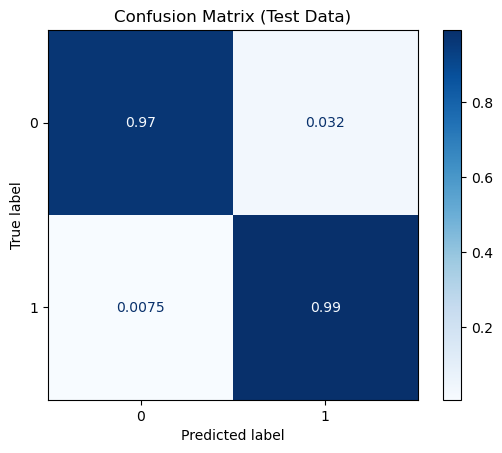

In [22]:
scores_split(model, X_preprocessed, y)

Using Train-Test Split
Accuracy:  0.9534518828451883
F1:  0.9534377810725339
Recall:  0.9678089304257529
ROC:  0.9533459825995992


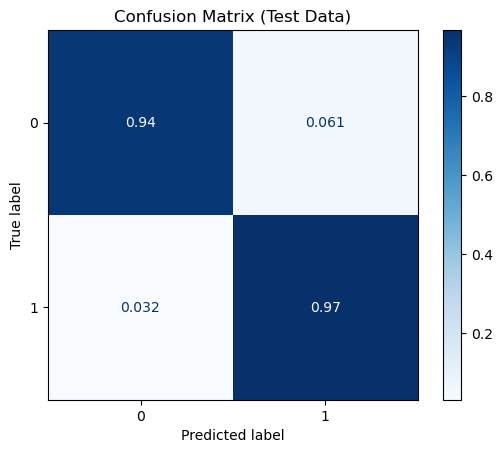

In [23]:
scores_split(model, X_preprocessed, y, test_size=0.4)

Using Cross-Validation with ShuffleSplit(n_splits=30, random_state=None, test_size=0.2, train_size=None) folds
accuracy: 0.9571304044630402
f1_weighted: 0.9563055642405777
recall_weighted: 0.9559100418410043
roc_auc: 0.9928056956741432


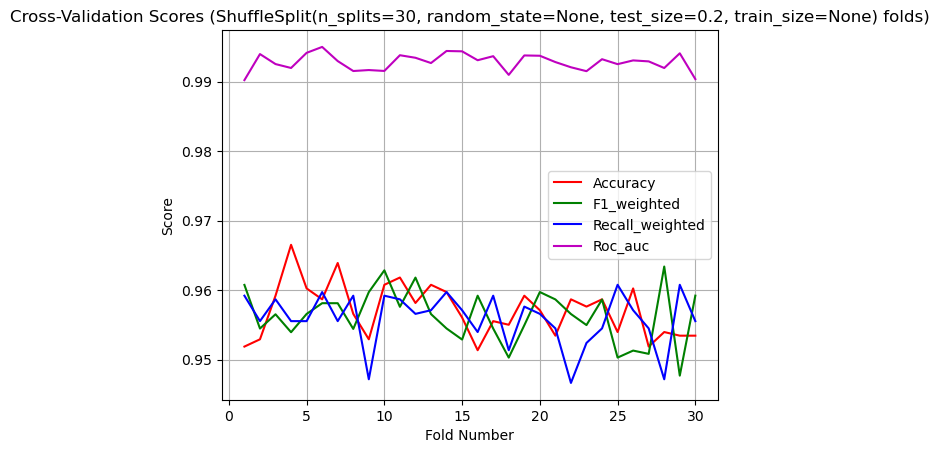

In [24]:
scores_split(model, X_preprocessed, y, cv=random_split)

Using Cross-Validation with KFold(n_splits=10, random_state=None, shuffle=True) folds
accuracy: 0.9581589958158997
f1_weighted: 0.9580389414431728
recall_weighted: 0.957531380753138
roc_auc: 0.9935564564337731


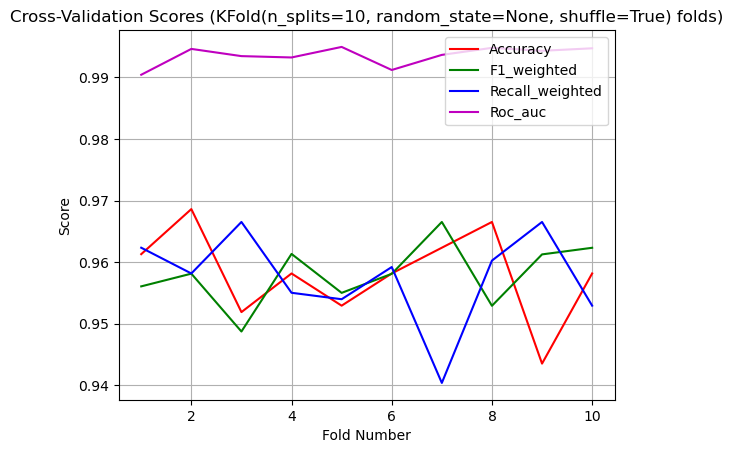

In [25]:
scores_split(model, X_preprocessed, y, cv=kfold)

Using Cross-Validation with StratifiedKFold(n_splits=10, random_state=None, shuffle=True) folds
accuracy: 0.9567991631799163
f1_weighted: 0.9578276384534103
recall_weighted: 0.9563807531380754
roc_auc: 0.9934708776106861


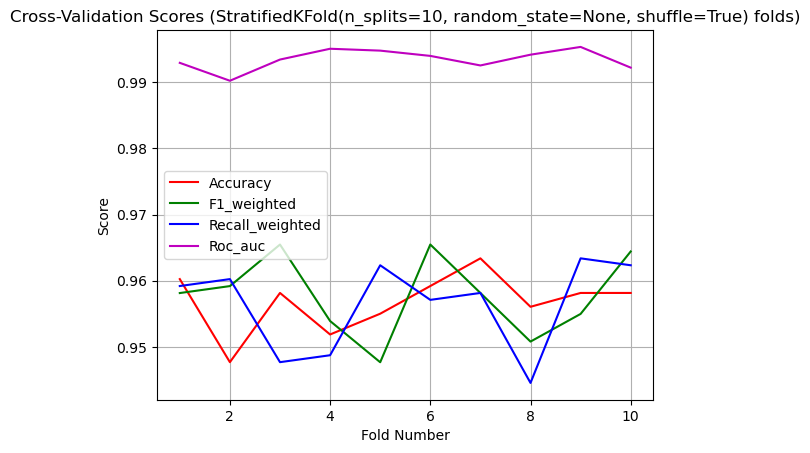

In [26]:
scores_split(model, X_preprocessed, y, cv=stratified_kfold)

In [27]:
# scores_split(model, X_preprocessed, y, cv=loo)

## Tests with Feature Selection

Not Using Train-Test Split
Accuracy:  0.8865062761506276
F1:  0.8864904172298457
Recall:  0.898326359832636
ROC:  0.8865062761506277


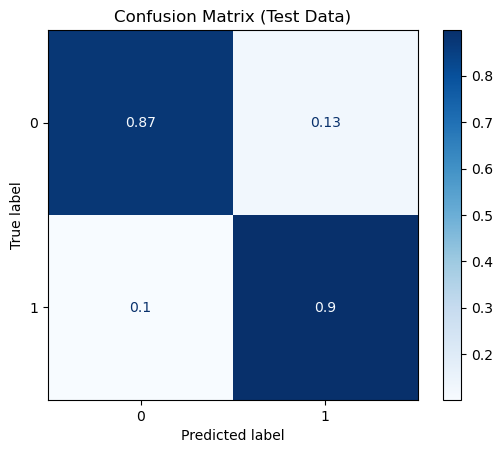

In [29]:
scores_split(model, X_preprocessed, y, feature_selection=True)

Using Train-Test Split
Accuracy:  0.886244769874477
F1:  0.886240483282143
Recall:  0.8914971309337506
ROC:  0.8862309986079346


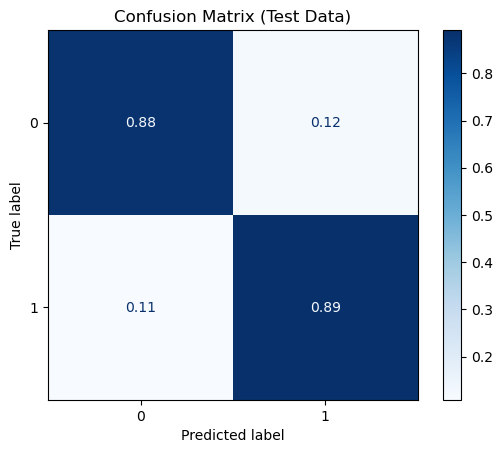

In [30]:
scores_split(model, X_preprocessed, y, test_size=0.4, feature_selection=True)

Using Cross-Validation with ShuffleSplit(n_splits=30, random_state=None, test_size=0.2, train_size=None) folds
accuracy: 0.8852336122733614
f1_weighted: 0.8847635876418765
recall_weighted: 0.8860355648535564
roc_auc: 0.9422584905261481


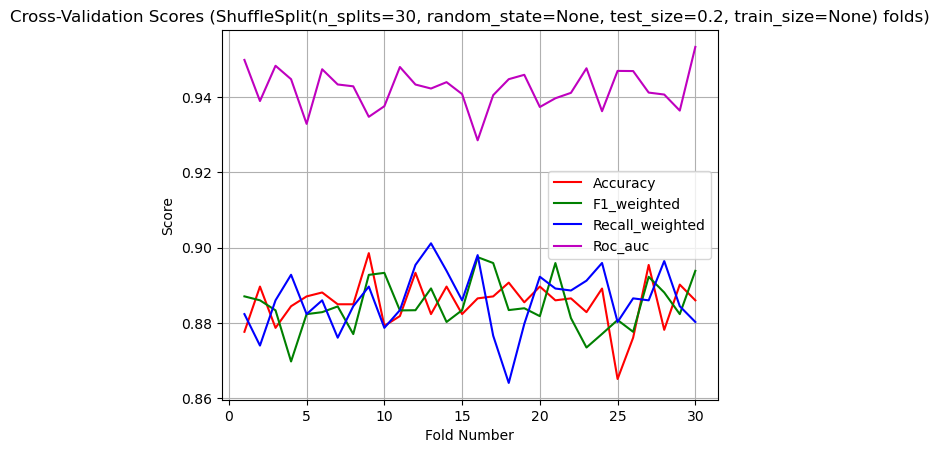

In [31]:
scores_split(model, X_preprocessed, y, cv=random_split, feature_selection=True)

Using Cross-Validation with KFold(n_splits=10, random_state=None, shuffle=True) folds
accuracy: 0.8848326359832637
f1_weighted: 0.8847107130606512
recall_weighted: 0.8849372384937239
roc_auc: 0.9420148598744171


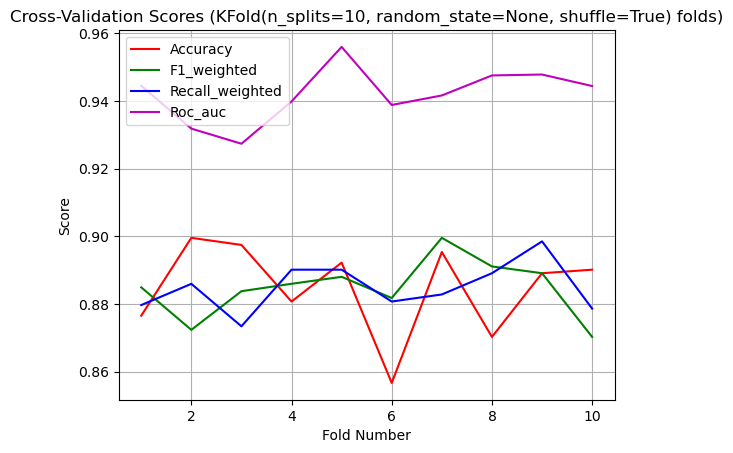

In [32]:
scores_split(model, X_preprocessed, y, cv=kfold, feature_selection=True)

Using Cross-Validation with StratifiedKFold(n_splits=10, random_state=None, shuffle=True) folds
accuracy: 0.8849372384937239
f1_weighted: 0.8856388239707249
recall_weighted: 0.8851464435146446
roc_auc: 0.9421972654540361


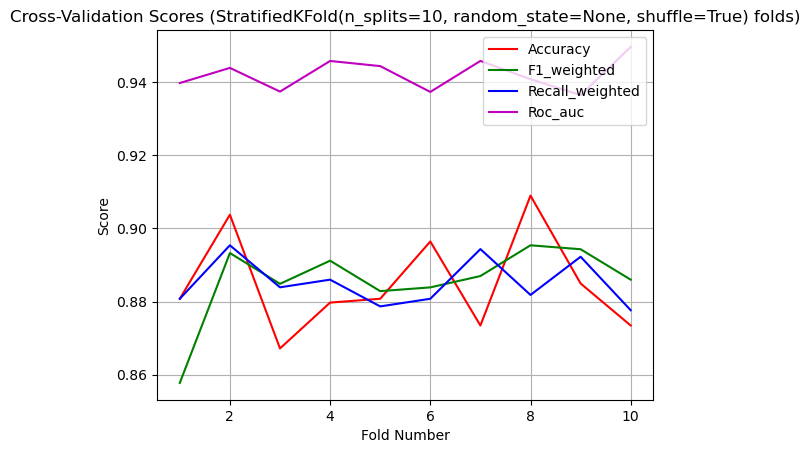

In [33]:
scores_split(model, X_preprocessed, y, cv=stratified_kfold, feature_selection=True)

In [34]:
# scores_split(model, X_preprocessed, y, cv=loo, feature_selection=True)